## Insurance Claims- Fraud Detection


### Problem Statement:


#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head(8)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN


In [4]:
df.tail(4)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
df.shape

(1000, 40)

In the above database there are 1000 rows and 40 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In the above data there is 2 columns is Float64 datatype, 17 Columns int64 datatype, and 21 columns is Object Data type.

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

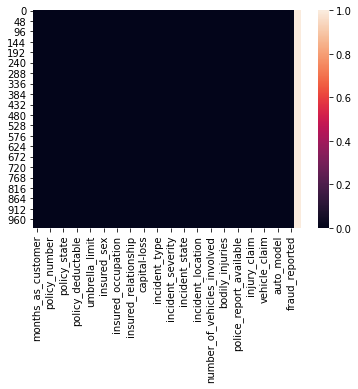

In [8]:
sns.heatmap(df.isnull())

In the above observation we see only _c39 have contains all the null values so we will drop it other wise there is no null values

In [10]:
df=df.drop(['_c39'],axis=1)

In [11]:
df.shape


(1000, 39)

In [12]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
16-05-2008    2
21-09-2005    2
             ..
22-02-1994    1
05-12-2013    1
11-05-1996    1
18-02-1995    1
28-07-2002    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

#### Chekcing for '?' value in the dataset

In [14]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [15]:
df.isin(['?']).sum().sum()

881

There are total 881 field having '?' values. Columns colision_type,property_damage, and police_report_available have '?' values which needs to be preprocessed.

In [16]:
#Handling the missing values in the dataset
#Replacing with null value
df=df.replace('?', np.nan)

In [17]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [18]:
isnull=['collision_type','property_damage','police_report_available' ]

In [19]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [20]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [21]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [22]:
# Now Replacing the missing values in isnull with highest frequency count of categories in each class using mode method.
for i in isnull:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [23]:
df.isnull().sum().sum()

0

now there is no null values

In [24]:
#Statistical summary of the data
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


- Total counts in all columns is 1000
- in age column Min Age is 19 Average age is 38 and max age is 64
- min policy_annual_premium is 433 , average premium is 1257 and max average premium 2047.
- min claim ammount is 100 , avg is 52761 and max claim ammount is 114920.

### EDA(Exploratory Data Anaylsis)
#### Univariate Anaylsis

In [25]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
# Storing all the numerical data columns
numerical=list(df.select_dtypes(['int64','float64']))

In [27]:
# Storing all the categorical data columns
categorical=list(df.select_dtypes(['object']))

In [28]:
len(numerical)

18

In [29]:
len(categorical)

21

In [30]:
# Target variable
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

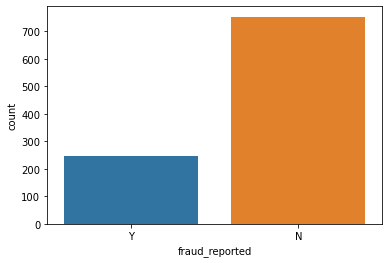

In [31]:
sns.countplot(df['fraud_reported'])

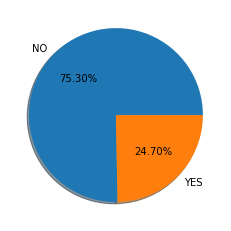

In [32]:
# Pie chart for class variable Loan Status
labels='NO','YES'
fig,ax=plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

There are 25% of fraud reported cases and 75% accounts for no fraud reported cases so we need to handle class imbalanced problem for better model result

<AxesSubplot:xlabel='policy_state', ylabel='count'>

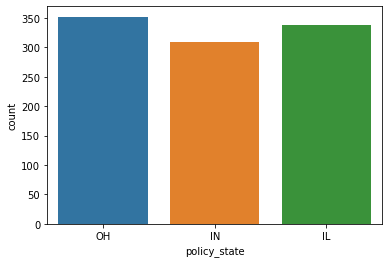

In [33]:
#policy state
sns.countplot(df['policy_state'])

we can see OH is Highest and IN is LOW


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

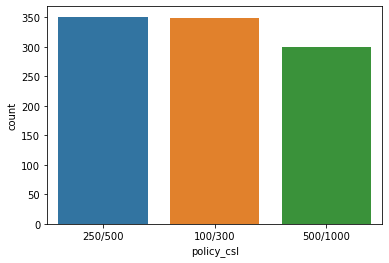

In [34]:
#Policy csl
sns.countplot(df['policy_csl'])

There is almost equal distribution in all three policy_csl.


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

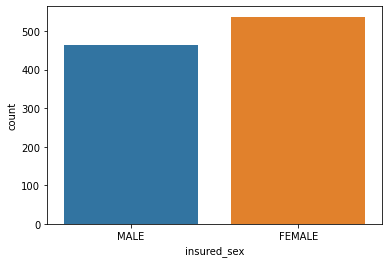

In [35]:
#insured_sex
sns.countplot(df['insured_sex'])

Female no is more as compare to Male

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

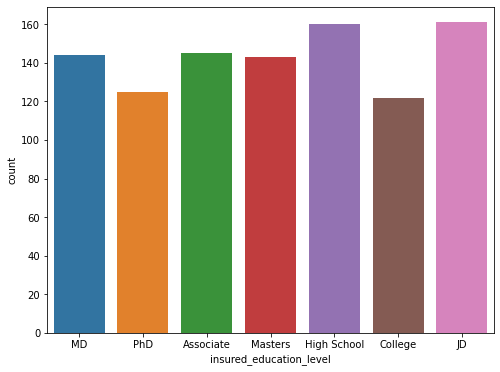

In [36]:
#insured education level
plt.figure(figsize=(8,6))
sns.countplot(df['insured_education_level'])

High school student and JD education level shows highest count of Insured persons.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

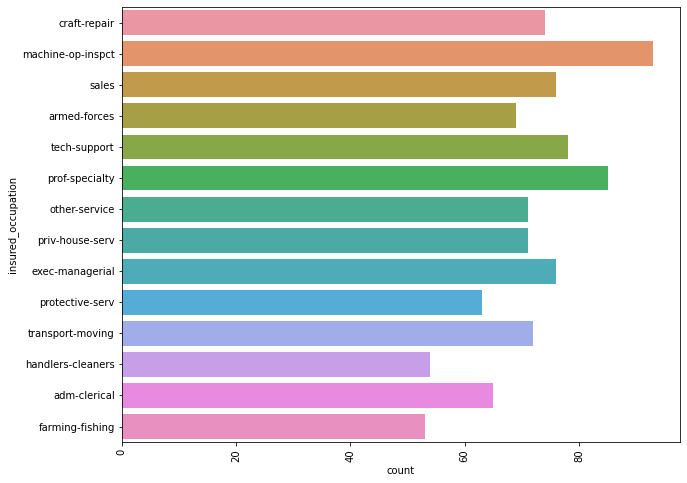

In [39]:
#insured occupation
plt.figure(figsize=(10,8))
sns.countplot(y='insured_occupation',data=df)
plt.xticks(rotation=90)

The above plot shows the different occupation of insured peoples, where machine-op-inspct as occupation shows highest count.

<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

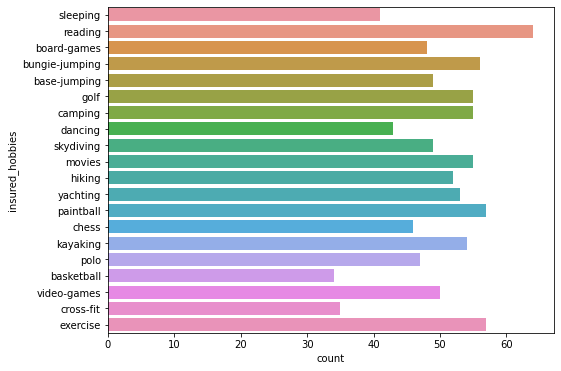

In [40]:
#insured hobbies
plt.figure(figsize=(8,6))
sns.countplot(y='insured_hobbies',data=df)

Reading,Excercise and Paintball shows the maximum count of Insured customers hobbies.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

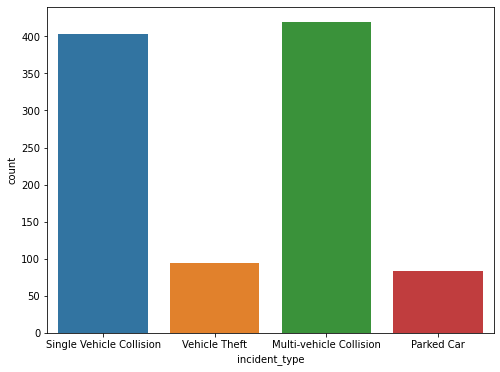

In [41]:
#incident type
plt.figure(figsize=(8,6))
sns.countplot(df['incident_type'])

From the above plot we can say that ,Most of the insured claim cases comes under Single and Multi Vehicle Collision. Vehicle Theft and Parked Car cases are very low.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

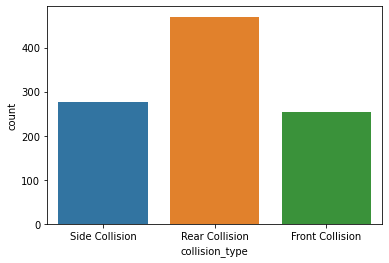

In [42]:
#collision type
sns.countplot(df['collision_type'])


Most number of Rear collision happened and Side Collsion and Front Collision are in equal distribution.

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

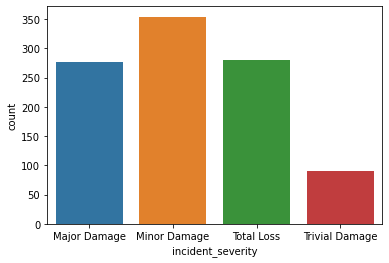

In [43]:
#incidient Severity
sns.countplot(df['incident_severity'])

Most of the claim include minor damage to the vehicle and very less vehicle has trivial damage

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

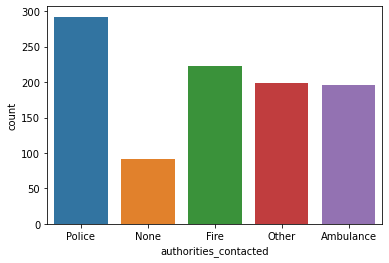

In [45]:
#Authorities Contacted 
sns.countplot(df['authorities_contacted'])

More number of people contacted police authorities as compared to other authorities.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

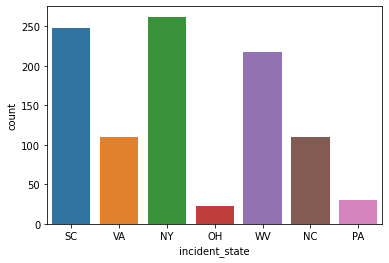

In [46]:
#Incident state
sns.countplot(df['incident_state'])

Most of the incident happened in NY Stateas as compare to other state

<AxesSubplot:xlabel='incident_city', ylabel='count'>

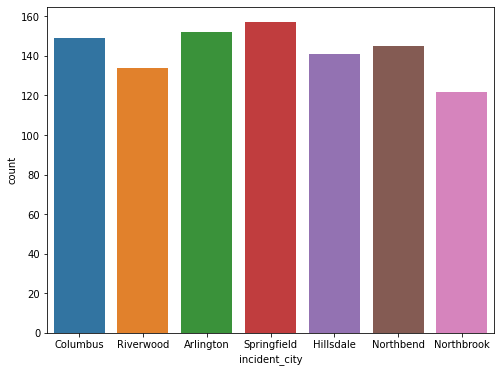

In [48]:
#Incident City
plt.figure(figsize=(8,6))
sns.countplot(df['incident_city'])


Most of the incident happened in Springfield city as compare to other city

<AxesSubplot:xlabel='property_damage', ylabel='count'>

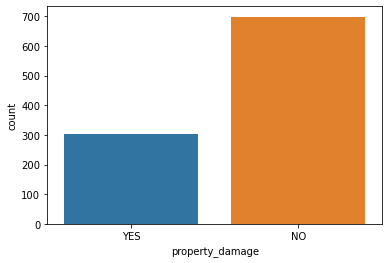

In [49]:
#Property Damage
sns.countplot(df['property_damage'])


mostly cases shown there is no property damage

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

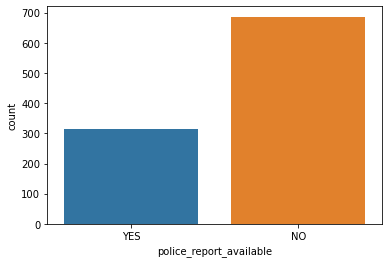

In [51]:
#Police report available
sns.countplot(df['police_report_available'])

in the above graph we can see most of the cases there is no police report available


<AxesSubplot:xlabel='count', ylabel='auto_make'>

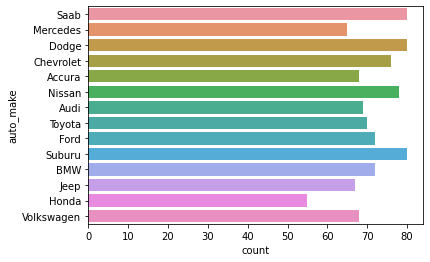

In [53]:
#auto make
sns.countplot(y='auto_make',data=df)

most of the vehicles company name is Saab, Dodge, Nissan,Suburu

<AxesSubplot:xlabel='count', ylabel='auto_model'>

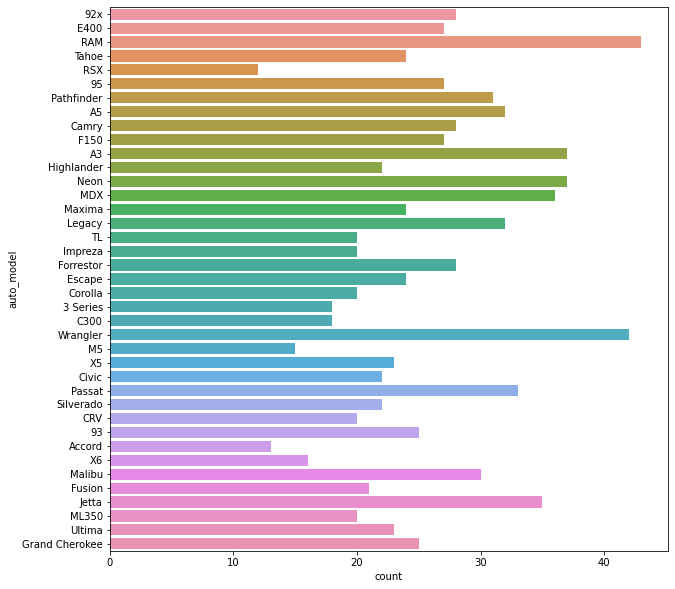

In [54]:
#Auto Model
plt.figure(figsize=(10,10))
sns.countplot(y='auto_model',data=df)

Most of the vehicle model is Wrangler, RAM


### Bivariate Anaylsis

<Figure size 1152x720 with 0 Axes>

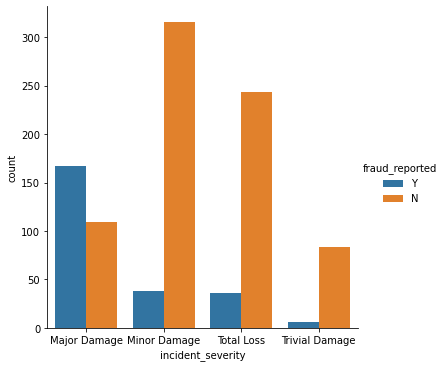

In [56]:
plt.figure(figsize=(16,10))
sns.factorplot(x='incident_severity',kind='count',data=df,hue='fraud_reported')

Molst of the Fraud detected in Major Damage cases

<Figure size 1152x720 with 0 Axes>

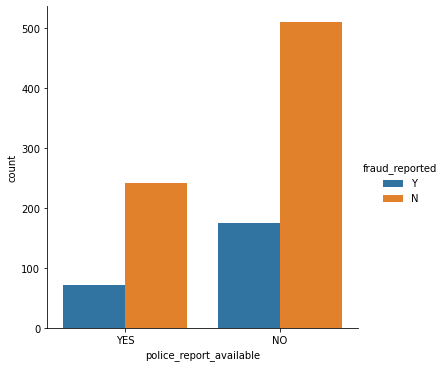

In [57]:
plt.figure(figsize=(16,10))
sns.factorplot(x='police_report_available',data=df,kind='count',hue='fraud_reported')

Most of the Fraud Case detected when there is no police report available.

<Figure size 1152x720 with 0 Axes>

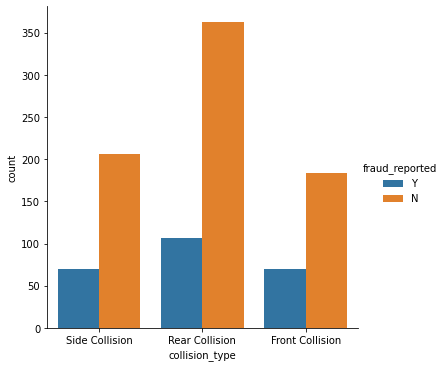

In [58]:
plt.figure(figsize=(16,10))
sns.factorplot(x='collision_type',data=df,kind='count',hue='fraud_reported')

Most of the Fraud Case detected when there is Rear Collision comes.

<Figure size 1152x720 with 0 Axes>

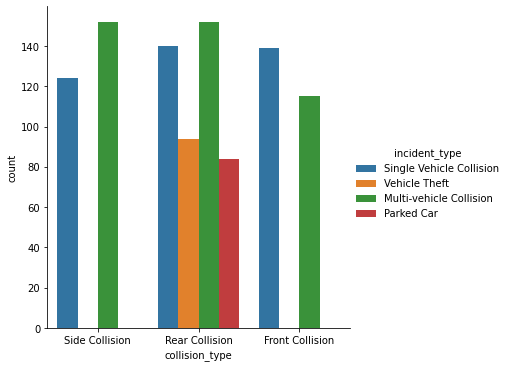

In [59]:
plt.figure(figsize=(16,10))
sns.factorplot(x='collision_type',data=df,kind='count',hue='incident_type')

The incident of vehile theft and Parked only occured in Rear collision accident.

<Figure size 1152x720 with 0 Axes>

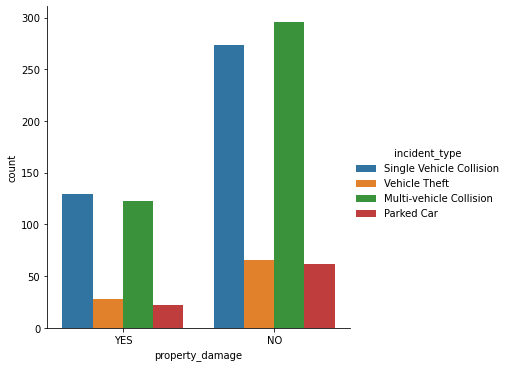

In [60]:
plt.figure(figsize=(16,10))
sns.factorplot(x='property_damage',data=df,kind='count',hue='incident_type')

The Vehicle suffered from single collision and multi collision caused more property damage as compared to other incidents.

<Figure size 1152x720 with 0 Axes>

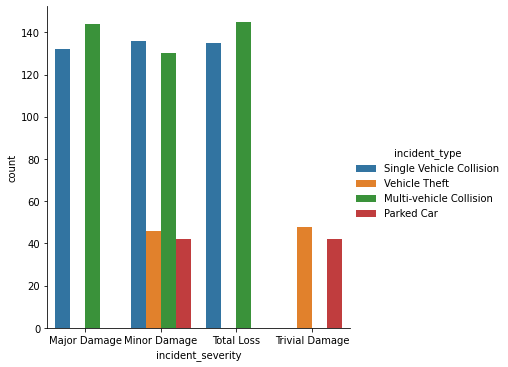

In [61]:
plt.figure(figsize=(16,10))
sns.factorplot(x='incident_severity',data=df,kind='count',hue='incident_type')

There is minor damage to vehicle in all types of incident whereas Trivial Damage cause to the customer is in Vehicle theft and Parked car

<AxesSubplot:xlabel='auto_make', ylabel='vehicle_claim'>

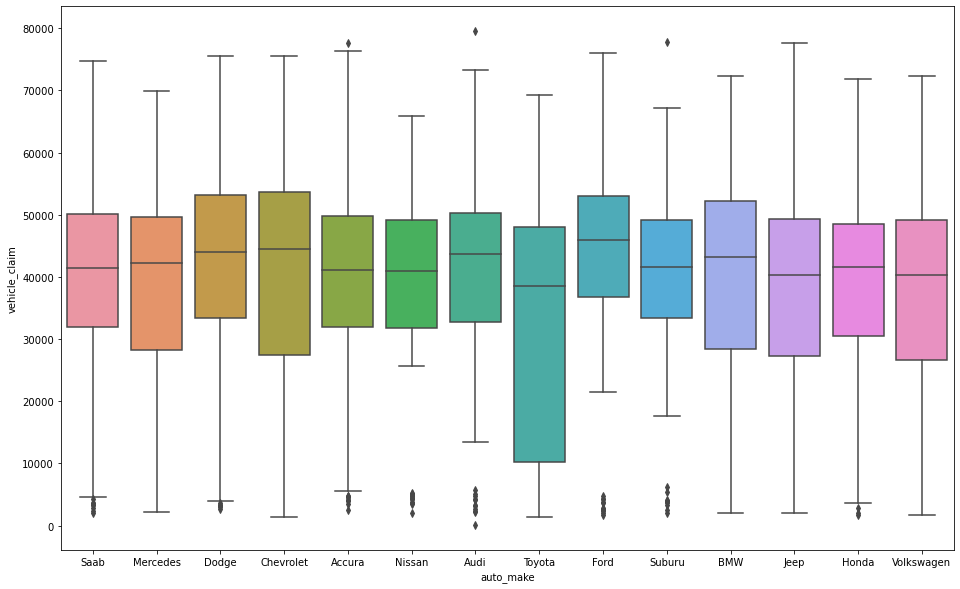

In [63]:
plt.figure(figsize=(16,10))
sns.boxplot(x='auto_make',y='vehicle_claim',data=df)


The above plot shows the relationship between different auto models and vehicle insured claim. Based upon outliers we can see that the highest and lowest vehcile claim is made by Audi model.

<AxesSubplot:xlabel='incident_type', ylabel='vehicle_claim'>

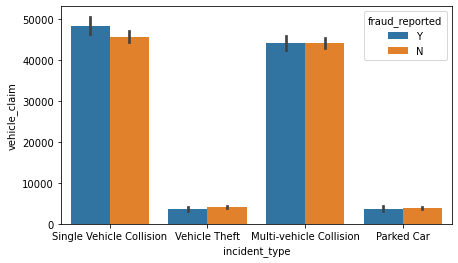

In [64]:
plt.figure(figsize=(7,4))
sns.barplot(df['incident_type'],df['vehicle_claim'],hue=df['fraud_reported'])

- Single and Mutli vehicle collision shows the highest vehcile claim.
- Claim amount for Vehicle Theft and Parked Car is very less.

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

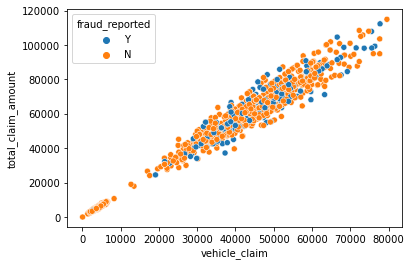

In [65]:
#plt.figure(figsize=(16,10))
sns.scatterplot(df['vehicle_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

The above graph shown possitive trend between Vehicle_claim, Total_claim_ammount and Fraud_reported

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

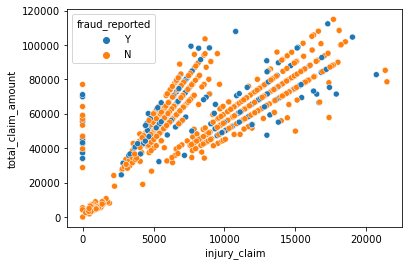

In [66]:
#plt.figure(figsize=(16,10))
sns.scatterplot(df['injury_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

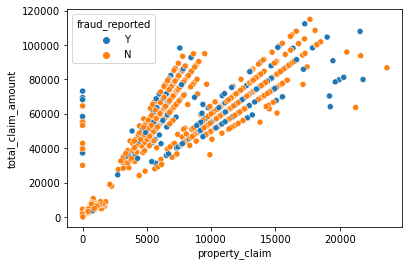

In [68]:
#plt.figure(figsize=(16,10))
sns.scatterplot(df['property_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

- We can see that total_claim_amount shows strong positive correlation with annual premium,injury_claim and Vehicle claim.
- One thing can be noticed here that total_claim amount is just result of all the above mentioned claim so thats why they are correlating with each othe

In [76]:
numerical

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

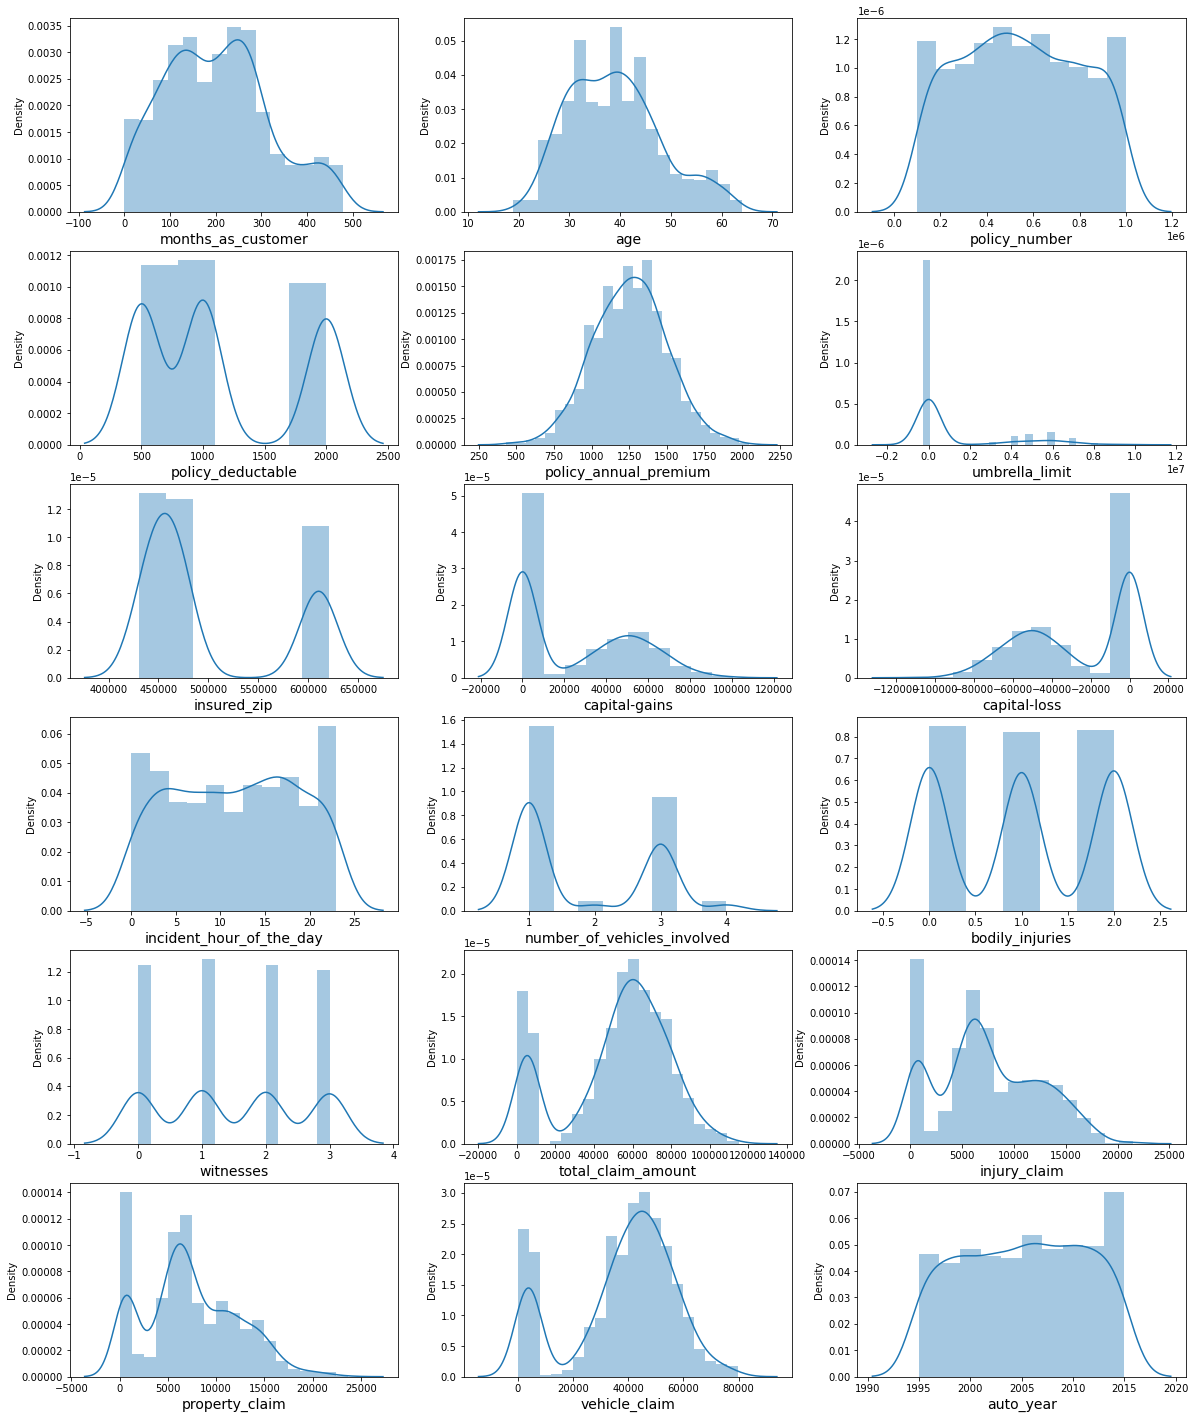

In [80]:
# Ploting Dist Plot for checking data distrubution
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df[numerical]:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

The above plot shows that most of the columns shows skewed distribution, column umbrella_limit shows right skewed distribution plot whereas column such as month_as_customer,age,policy_number shows less skewed more like normal distribution graph.The Policy_annual_premium shows perfect normal distribution graph.

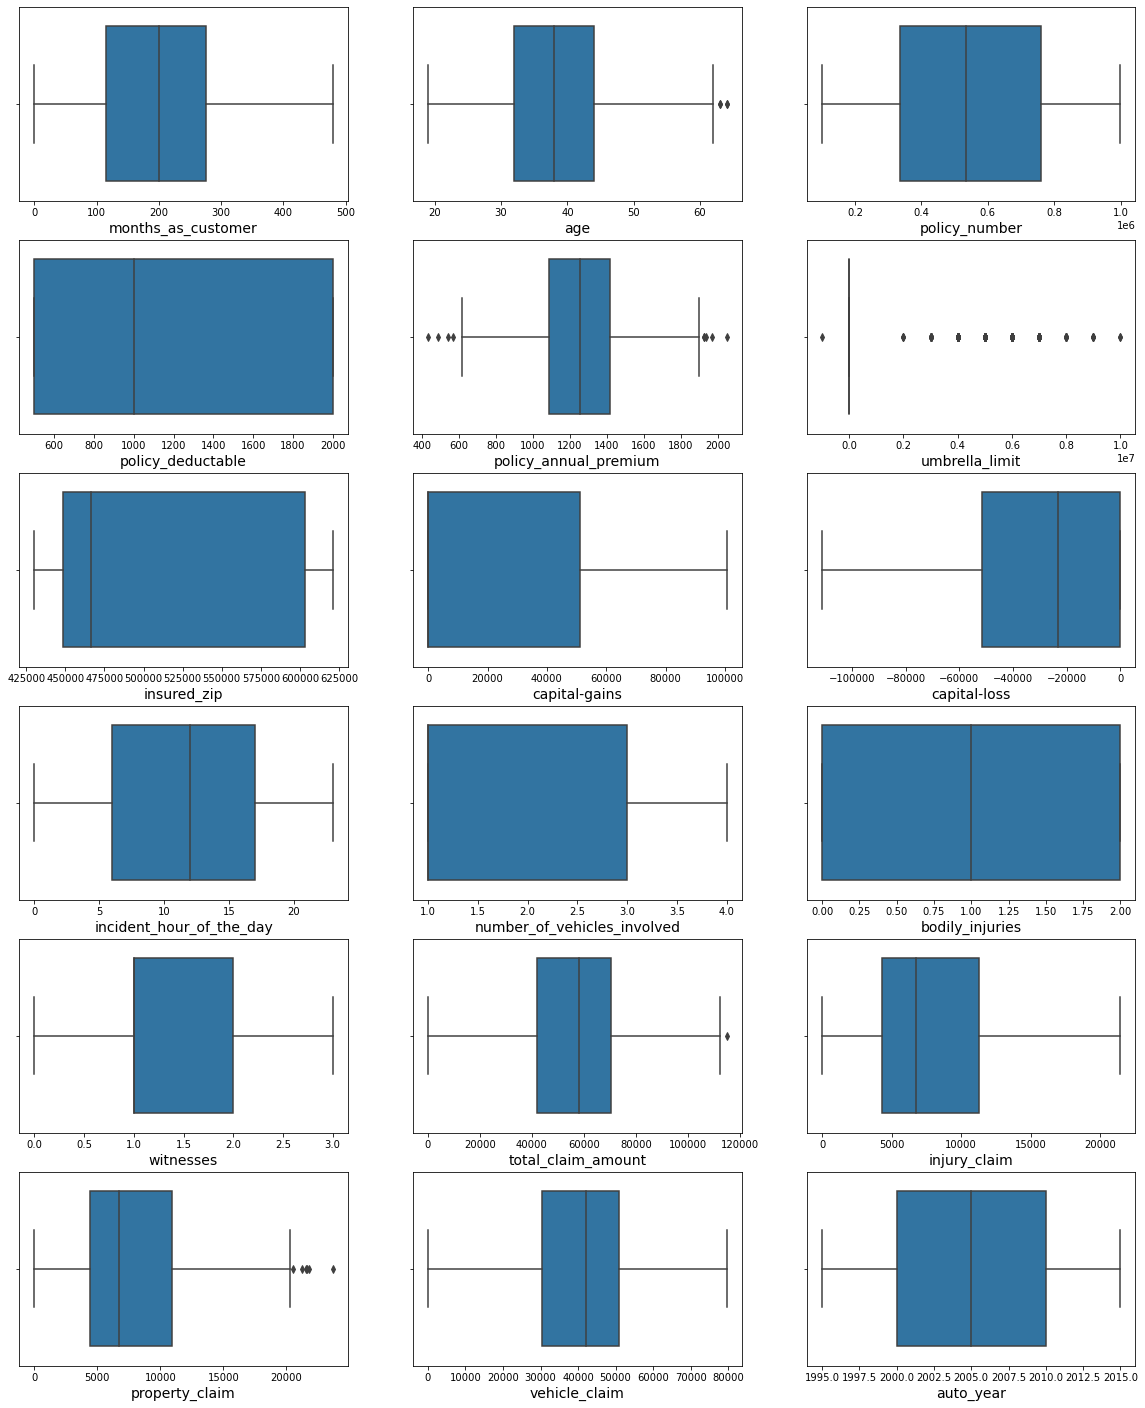

In [82]:
# Finding Outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df[numerical]:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()


Age, Policy_annual_premium,Umbrella limit,Total_claim_ammount, Property_claim shows few outliers we wiil handdle it below

### Encoded the Object Data

In [83]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [84]:
#Dropping the uncessary columns
df.drop(["policy_number","insured_zip"], axis = 1, inplace = True)

### Mutlivariate Anaylsis

In [85]:
df.corr()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_bind_date,0.055055,0.056538,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,0.039338,0.040606,...,-0.007004,-0.011563,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,0.039338,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,0.040606,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,...,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


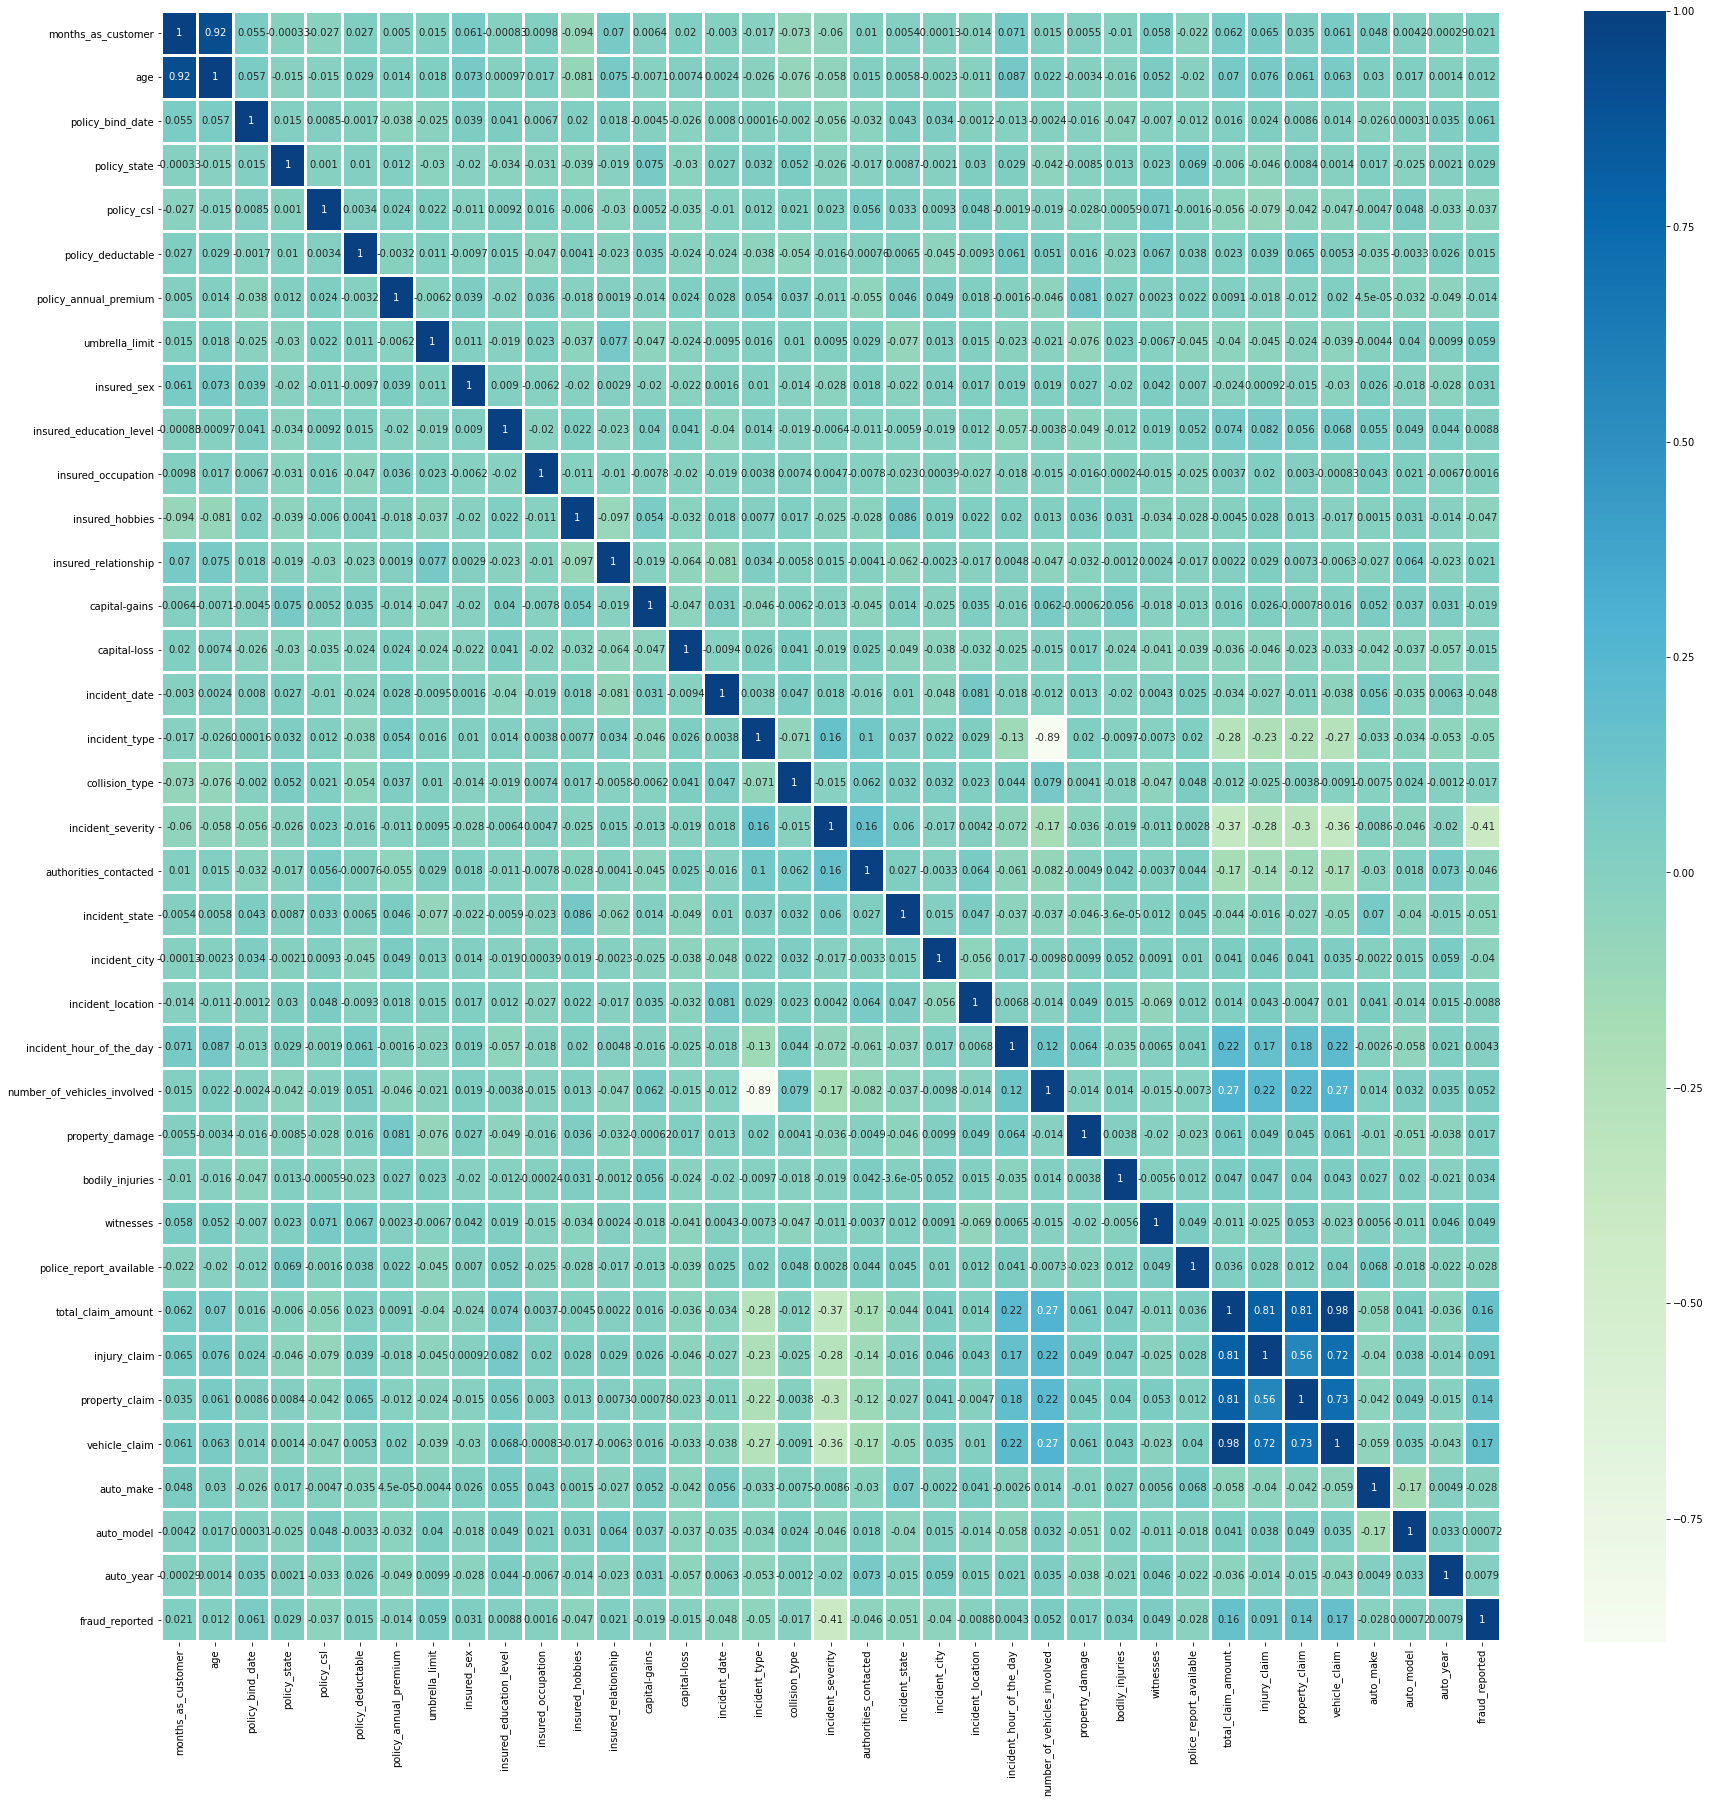

In [89]:
corr_hmap=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_hmap,annot=True,cmap='GnBu',linewidths=2)
plt.show()

- From the above plot, we can see that there is high correlation between age and months_as_customer.
- There is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others 

In [90]:
# Checking the correalation values in descending order
corr_hmap['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863


### Removing the Outliers

In [92]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [93]:
df.shape

(1000, 37)

In [94]:
new_df.shape

(980, 37)

In [95]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss



2.0

After removing the outliers from the data the shape of the data has change from (1000,37) to (980,37) which shows that with the z score method we are able to remove various rows with lossing about 2.0 percent of data , Hence our new data shape is (980,37)

### Checking for Skewness

In [96]:
new_df.skew()

months_as_customer             0.362608
age                            0.475385
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


 There is no skeweness in the above data

### Splitting the data into input and target variables

In [97]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['fraud_reported'], axis = 1)
y=new_df["fraud_reported"]

In [99]:
# Handling Class Imbalanced problem by oversampling the minority class
from imblearn.over_sampling import SMOTE
SM =SMOTE(0.80)
x_over, y_over = SM.fit_resample(x, y)

In [100]:
y_over.value_counts()

0    740
1    592
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

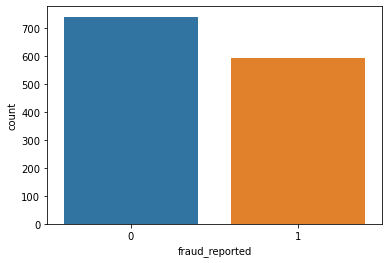

In [102]:
sns.countplot(y_over)

Now the class varible is balanced by using oversampling.
## Model Building

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [104]:
# Finding the best Random State
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.6404494382022472 on random state 28


In [105]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2,random_state=maxRS)

In [106]:
# Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Logistic Regression

Accuracy score using logistic regression model is 84.26966292134831
Cross validation score 75.40816326530613
-----------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       156
           1       0.80      0.83      0.81       111

    accuracy                           0.84       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.84      0.84      0.84       267

-----------------------------

 Confusion Matrix


<AxesSubplot:>

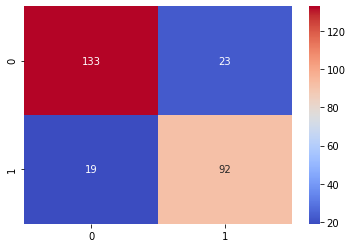

In [108]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

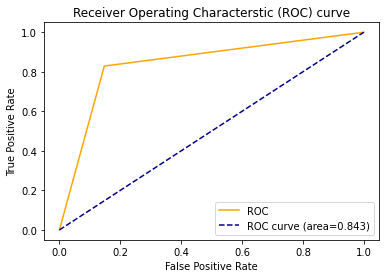

In [109]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% lr_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifier


Accuracy of Decision Tree classification is  77.90262172284645
Cross validation score 77.9591836734694
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       156
           1       0.75      0.71      0.73       111

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267


 Confusion Matrix


<AxesSubplot:>

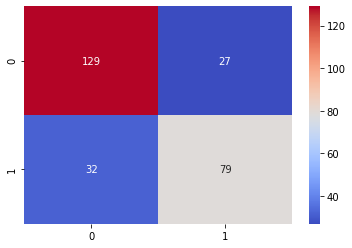

In [111]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_cv=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",dtc_cv*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

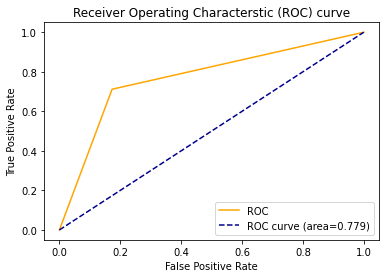

In [112]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% dtc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Support Vector Classifier

Accuracy of Support Vector Classification is  86.51685393258427
Cross validation score 75.51020408163265
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       156
           1       0.84      0.83      0.84       111

    accuracy                           0.87       267
   macro avg       0.86      0.86      0.86       267
weighted avg       0.86      0.87      0.86       267


 Confusion Matrix


<AxesSubplot:>

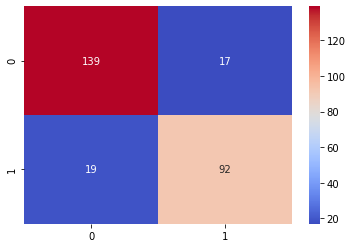

In [113]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
svc_cv=cross_val_score(svc,x,y,cv=5).mean()
print("Cross validation score",svc_cv*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

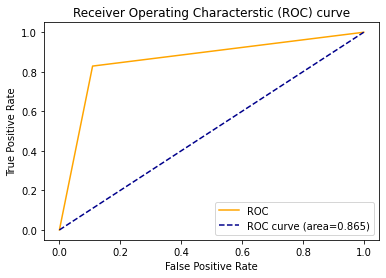

In [114]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% svc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

Accuracy of Random Forest Classificarion is  87.26591760299625
Cross validation score 77.04081632653062
-------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       156
           1       0.88      0.80      0.84       111

    accuracy                           0.87       267
   macro avg       0.87      0.86      0.87       267
weighted avg       0.87      0.87      0.87       267

-------------------------------

 Confusion Matrix


<AxesSubplot:>

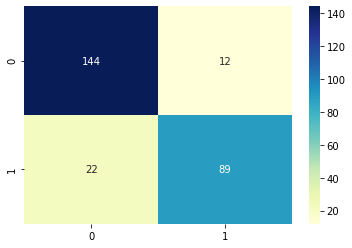

In [115]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

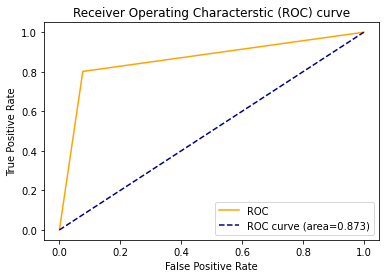

In [116]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% rfc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier 

Accuracy score using gradient boosting classifier model is 83.14606741573034
Cross validation score 82.6530612244898
-------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       156
           1       0.81      0.77      0.79       111

    accuracy                           0.83       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.83      0.83      0.83       267

-------------------------------

 Confusion Matrix


<AxesSubplot:>

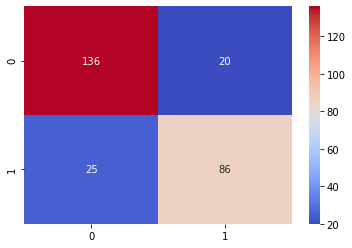

In [117]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=25)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_cv=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",gbc_cv*100)
print('-------------------------------')
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

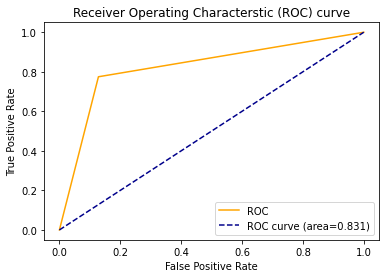

In [118]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% gbc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [119]:
#Storing the model
model=['Logistic Regression','Decision Tree Classifier','Support Vector Classifier','Random Forest Classifier','Gradient boosting Classifier']

acc=[lr_acc*100,dtc_acc*100,svc_acc*100,rfc_acc*100,gbc_acc*100]

cv_score=[lr_cv*100,dtc_cv*100,svc_cv*100,rfc_cv*100,gbc_cv*100]
diff=[acc[0]-cv_score[0],acc[1]-cv_score[1],acc[2]-cv_score[2],acc[3]-cv_score[3],acc[4]-cv_score[4]]
diff
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'Cross Validation_score':cv_score,'Difference':diff})
result

,Model,Accuracy_score,Cross Validation_score,Difference
0,Logistic Regression,84.269663,75.408163,8.861500
1,Decision Tree Classifier,77.902622,77.959184,-0.056562
2,Support Vector Classifier,86.516854,75.510204,11.006650
3,Random Forest Classifier,87.265918,77.040816,10.225101
4,Gradient boosting Classifier,83.146067,82.653061,0.493006


### Choosing the model
Randome Forest Classifier gives accuracy score of 87.26% but cross validation difference is 10 whereas in Gradient Boosting Classifier gives accuracy of nearly 82% but cross validation difference is 0.49, So I am going to choose gradient boosting classifier as best model.

### Applying hyperparameter to the best accuracy model

In [120]:
parameters= {
    'n_estimators':[300,500],
    'max_depth': [8,12],
    'criterion':['friedman_mse', 'mse'],
    'learning_rate':[0.2,0.3]
    }

In [121]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [122]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.2, 0.3], 'max_depth': [8, 12],
                         'n_estimators': [300, 500]})

In [123]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'max_depth': 8,
 'n_estimators': 500}

In [130]:
Final_model=GradientBoostingClassifier(n_estimators= 500,criterion='friedman_mse',learning_rate=0.3,max_depth=8)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Gradient boosting classifier is ",acc_final*100)


Accuracy of the model using Gradient boosting classifier is  87.26591760299625


#### With hyperparameter tuning model accuracy has increased from 82. to 87 percent approximately.


### Plotting ROC curve

In [125]:
# Plotting Roc curve and roc_auc value for predcited probabalities
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [126]:
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

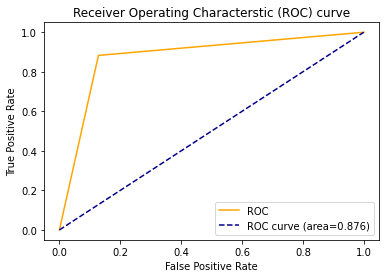

In [127]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

### Saving the Model

In [128]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [129]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']